## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢  Accuracy and Loss will eventually approach a maximum value.
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢 Learning curve become slower.

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """ 
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 130us/step - loss: 2.1039 - acc: 0.2420 - val_loss: 1.9634 - val_acc: 0.3063
Epoch 2/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8981 - acc: 0.3306 - val_loss: 1.8482 - val_acc: 0.3462
Epoch 3/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.8146 - acc: 0.3639 - val_loss: 1.7859 - val_acc: 0.3778
Epoch 4/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.7599 - acc: 0.3863 - val_loss: 1.7483 - val_acc: 0.3829
Epoch 5/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.7185 - acc: 0.3994 - val_loss: 1.7057 - val_acc: 0.3983
Epoch 6/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.6848 - acc: 0.4117 - val_loss: 1.6749 - val_acc: 0.4153
Epoch 7/500
50000/50000 [==============================] - 6s 125us/

50000/50000 [==============================] - 6s 126us/step - loss: 1.0238 - acc: 0.6413 - val_loss: 1.3327 - val_acc: 0.5309
Epoch 67/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.0167 - acc: 0.6451 - val_loss: 1.3513 - val_acc: 0.5253
Epoch 68/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.0050 - acc: 0.6497 - val_loss: 1.4106 - val_acc: 0.5063
Epoch 69/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.9980 - acc: 0.6519 - val_loss: 1.4337 - val_acc: 0.5029
Epoch 70/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.9949 - acc: 0.6543 - val_loss: 1.3869 - val_acc: 0.5207
Epoch 71/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.9849 - acc: 0.6574 - val_loss: 1.3485 - val_acc: 0.5306
Epoch 72/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.9778 - acc: 0.6580 - val_loss: 1.3751 - val_acc: 0.5243
Epoch 73/500
50000/50000 [=======

50000/50000 [==============================] - 6s 128us/step - loss: 0.6428 - acc: 0.7775 - val_loss: 1.5973 - val_acc: 0.5189
Epoch 125/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.6286 - acc: 0.7846 - val_loss: 1.6974 - val_acc: 0.4985
Epoch 126/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.6271 - acc: 0.7852 - val_loss: 1.5972 - val_acc: 0.5172
Epoch 127/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.6195 - acc: 0.7878 - val_loss: 1.8266 - val_acc: 0.4782.
Epoch 128/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.6217 - acc: 0.7849 - val_loss: 2.3080 - val_acc: 0.4306
Epoch 129/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.6155 - acc: 0.7901 - val_loss: 1.6797 - val_acc: 0.5053
Epoch 130/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.6013 - acc: 0.7959 - val_loss: 1.6503 - val_acc: 0.5120
Epoch 131/500
50000/50000 

50000/50000 [==============================] - 6s 127us/step - loss: 0.3264 - acc: 0.8955 - val_loss: 2.1813 - val_acc: 0.4985
Epoch 183/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.3121 - acc: 0.9016 - val_loss: 1.9205 - val_acc: 0.5352
Epoch 184/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.3353 - acc: 0.8904 - val_loss: 2.0308 - val_acc: 0.5200
Epoch 185/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.3778 - acc: 0.8776 - val_loss: 2.1744 - val_acc: 0.5014
Epoch 186/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.3110 - acc: 0.9020 - val_loss: 2.1047 - val_acc: 0.5132
Epoch 187/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2944 - acc: 0.9079 - val_loss: 2.0333 - val_acc: 0.5268
Epoch 188/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2977 - acc: 0.9052 - val_loss: 1.9763 - val_acc: 0.5319
Epoch 189/500
50000/50000 [

50000/50000 [==============================] - 6s 126us/step - loss: 0.1106 - acc: 0.9746 - val_loss: 2.4539 - val_acc: 0.5276
Epoch 241/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1082 - acc: 0.9752 - val_loss: 2.5010 - val_acc: 0.5268
Epoch 242/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1155 - acc: 0.9715 - val_loss: 2.5511 - val_acc: 0.5209
Epoch 243/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.1053 - acc: 0.9756 - val_loss: 2.6217 - val_acc: 0.5121
Epoch 244/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.4911 - acc: 0.8808 - val_loss: 2.4989 - val_acc: 0.5280
Epoch 245/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1174 - acc: 0.9709 - val_loss: 2.6631 - val_acc: 0.5123
Epoch 246/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1042 - acc: 0.9763 - val_loss: 2.5054 - val_acc: 0.5276
Epoch 247/500
50000/50000 [

50000/50000 [==============================] - 6s 129us/step - loss: 0.0370 - acc: 0.9959 - val_loss: 2.8896 - val_acc: 0.5229
Epoch 299/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0355 - acc: 0.9965 - val_loss: 2.9888 - val_acc: 0.5193
Epoch 300/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0381 - acc: 0.9953 - val_loss: 2.9053 - val_acc: 0.5282
Epoch 301/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0330 - acc: 0.9971 - val_loss: 2.9120 - val_acc: 0.5274
Epoch 302/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0312 - acc: 0.9977 - val_loss: 2.9925 - val_acc: 0.5236
Epoch 303/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0320 - acc: 0.9972 - val_loss: 2.9267 - val_acc: 0.5250
Epoch 304/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0305 - acc: 0.9976 - val_loss: 2.9442 - val_acc: 0.5271
Epoch 305/500
50000/50000 [

50000/50000 [==============================] - 6s 126us/step - loss: 0.0288 - acc: 0.9975 - val_loss: 3.0452 - val_acc: 0.5290
Epoch 356/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0235 - acc: 0.9988 - val_loss: 3.0621 - val_acc: 0.5293
Epoch 357/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.0225 - acc: 0.9986 - val_loss: 3.0624 - val_acc: 0.5310
Epoch 358/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0210 - acc: 0.9989 - val_loss: 3.0705 - val_acc: 0.5270
Epoch 359/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0214 - acc: 0.9989 - val_loss: 3.0789 - val_acc: 0.5255
Epoch 360/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0196 - acc: 0.9992 - val_loss: 3.0750 - val_acc: 0.5279
Epoch 361/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0187 - acc: 0.9993 - val_loss: 3.1232 - val_acc: 0.5255
Epoch 362/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 3.3645 - val_acc: 0.5289
Epoch 414/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.3619 - val_acc: 0.5272
Epoch 415/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 3.3763 - val_acc: 0.5280
Epoch 416/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.3695 - val_acc: 0.5296
Epoch 417/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0069 - acc: 0.9999 - val_loss: 3.3837 - val_acc: 0.5304
Epoch 418/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.3846 - val_acc: 0.5279
Epoch 419/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.3817 - val_acc: 0.5253
Epoch 420/500
50000/50000 [

50000/50000 [==============================] - 6s 129us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.5343 - val_acc: 0.5273
Epoch 472/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 3.5303 - val_acc: 0.5257
Epoch 473/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.5396 - val_acc: 0.5263
Epoch 474/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.5391 - val_acc: 0.5276
Epoch 475/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.5456 - val_acc: 0.5260
Epoch 476/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 3.5438 - val_acc: 0.5302
Epoch 477/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 3.5436 - val_acc: 0.5282
Epoch 478/500
50000/50000 [

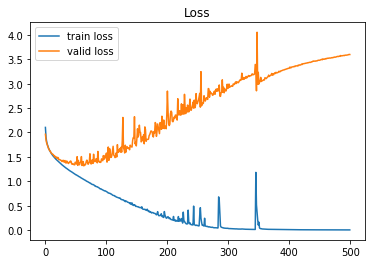

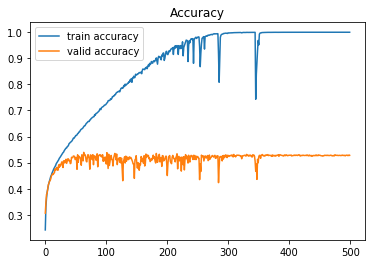

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()